In [312]:
##library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [313]:
#data load
df = pd.read_csv('Group_1_ML_Task_Dataset.csv')

In [314]:
df.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age,...,Postal_Code,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Region_Name,State_Name,City_Name,C_Response
0,1,telephone,may,mon,307,1,999,0,nonexistent,56,...,42420,1.1,93.994,-36.4,4.857,5191.0,South,Kentucky,Henderson,no
1,2,telephone,may,mon,198,1,999,0,nonexistent,45,...,42420,1.1,93.994,-36.4,4.857,5191.0,South,Kentucky,Henderson,no
2,539,telephone,may,tue,389,1,999,0,nonexistent,32,...,42420,1.1,93.994,-36.4,4.857,5191.0,South,Kentucky,Henderson,no
3,540,telephone,may,tue,158,1,999,0,nonexistent,36,...,42420,1.1,93.994,-36.4,4.857,5191.0,South,Kentucky,Henderson,no
4,997,telephone,may,wed,196,2,999,0,nonexistent,31,...,42420,1.1,93.994,-36.4,4.856,5191.0,South,Kentucky,Henderson,no


In [315]:
df.describe()

,Customer_id,duration,campaign,pdays,previous,age,Region_Code_x,Postal_Code,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000
mean,18546.444495,258.157114,2.568793,962.498406,0.173077,40.043593,2.571791,55183.776712,0.082014,93.575909,-40.505396,3.621118,5167.027515
std,10704.860914,258.583654,2.769820,186.853382,0.495855,10.434720,1.162268,32057.872950,1.569195,0.578436,4.622698,1.734113,72.217683
min,1.000000,0.000000,1.000000,0.000000,0.000000,17.000000,1.000000,1040.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,102.000000,1.000000,999.000000,0.000000,32.000000,2.000000,23223.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18541.500000,180.000000,2.000000,999.000000,0.000000,38.000000,2.000000,55901.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,319.000000,3.000000,999.000000,0.000000,47.000000,4.000000,90008.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,4918.000000,56.000000,999.000000,7.000000,98.000000,4.000000,99301.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37024 entries, 0 to 37023
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37024 non-null  int64  
 1   contact         37024 non-null  object 
 2   month           37024 non-null  object 
 3   day_of_week     37024 non-null  object 
 4   duration        37024 non-null  int64  
 5   campaign        37024 non-null  int64  
 6   pdays           37024 non-null  int64  
 7   previous        37024 non-null  int64  
 8   poutcome        37024 non-null  object 
 9   age             37024 non-null  int64  
 10  job             37024 non-null  object 
 11  marital         37024 non-null  object 
 12  education       37024 non-null  object 
 13  default         37024 non-null  object 
 14  housing         37024 non-null  object 
 15  loan            37024 non-null  object 
 16  Region_Code_x   37024 non-null  int64  
 17  State_Code_x    37024 non-null 

In [317]:
#C_Response is target varible here. 
df.groupby('C_Response').size()

C_Response
no     32824
yes     4200
dtype: int64

In [318]:
#checking for null values
df.isnull().sum()

Customer_id       0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code_x     0
State_Code_x      0
City_Code         0
Postal_Code       0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
Region_Name       0
State_Name        0
City_Name         0
C_Response        0
dtype: int64

# Feature Engineering and EDA

In [319]:
df['FINAL_OUTVAR'] = (df.C_Response == 'yes').astype('int')

In [320]:
col_numeric = ['duration','campaign','pdays','previous','age','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
col_categorical = ['contact','month','day_of_week','poutcome','job','marital','education','default','housing','loan']

In [321]:
#one hot encoding on categorical varibles
new_col_categorical = pd.get_dummies(df[col_categorical],drop_first = False)
new_col_categorical.head()

,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [322]:
df = pd.concat([df,new_col_categorical],axis = 1)

In [323]:
col_inp = col_numeric + list(new_col_categorical.columns)
df_data = df[col_inp + ['FINAL_OUTVAR']]

In [324]:
df_data.head(5)

,duration,campaign,pdays,previous,age,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,FINAL_OUTVAR
0,307,1,999,0,56,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,0,1,0
1,198,1,999,0,45,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,1,0,0,1,0,0,0
2,389,1,999,0,32,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,1,0,0,0
3,158,1,999,0,36,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,1,0,0,0
4,196,2,999,0,31,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,1,0,0,1,0,0,0


# Train Test Split

In [325]:
##Split train test data
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [326]:
df_valid_test = df_data.sample(frac = 0.30,random_state = 42)

In [327]:
df_test = df_valid_test.sample(frac = 0.50,random_state=42)
df_valid = df_valid_test.drop(df_test.index)

In [328]:
df_train_all = df_data.drop(df_valid_test.index)

In [329]:
#check if new dfs are balanced or not
print('test distribution:',(df_test.groupby('FINAL_OUTVAR').size()))
print('valid distribution:',(df_valid.groupby('FINAL_OUTVAR').size()))
print('train distribution:',(df_train_all.groupby('FINAL_OUTVAR').size()))

test distribution: FINAL_OUTVAR
0    4917
1     637
dtype: int64
valid distribution: FINAL_OUTVAR
0    4914
1     639
dtype: int64
train distribution: FINAL_OUTVAR
0    22993
1     2924
dtype: int64


In [330]:
#ABove stats confirms that its imbalance dataset. 
#split train data into positive and negatives
rows_pos = df_train_all.FINAL_OUTVAR == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

#merge balance data
df_train = pd.concat([df_train_pos,df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

#shuffle samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_train.groupby('FINAL_OUTVAR').size()))

train distribution: FINAL_OUTVAR
0    2924
1    2924
dtype: int64


In [331]:
#split valid data into positive and negatives
rows_pos = df_valid.FINAL_OUTVAR == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

#merge balance data
df_valid = pd.concat([df_valid_pos,df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

#shuffle samples
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('FINAL_OUTVAR').size()))

train distribution: FINAL_OUTVAR
0    639
1    639
dtype: int64


In [332]:
#split test data into positive and negatives
rows_pos = df_test.FINAL_OUTVAR == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

#merge balance data
df_test = pd.concat([df_test_pos,df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

#shuffle samples
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('FINAL_OUTVAR').size()))

train distribution: FINAL_OUTVAR
0    639
1    639
dtype: int64


In [333]:
##create x and y matrics for input to ML packages(isolating target varible)
X_train = df_train[col_inp].values
X_train_all = df_train_all[col_inp].values
X_valid = df_valid[col_inp].values

y_train = df_train['FINAL_OUTVAR'].values
y_valid = df_valid['FINAL_OUTVAR'].values

print('training all shape:',X_train_all.shape)
print('train shape:',X_train.shape,y_train.shape)
print('valid shape:',X_valid.shape,y_valid.shape)

training all shape: (25917, 63)
train shape: (5848, 63) (5848,)
valid shape: (1278, 63) (1278,)


In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
scalar = StandardScaler()
scalar.fit(X_train_all)

StandardScaler()

In [336]:
X_train_tf = scalar.transform(X_train)
X_valid_tf = scalar.transform(X_valid)

In [337]:
import time 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# KNN

In [338]:
 from sklearn.neighbors import KNeighborsClassifier

In [339]:
knn = KNeighborsClassifier(n_neighbors=100)
t1 = time.time()
knn.fit(X_train_tf,y_train)
pred1 = knn.predict(X_valid_tf)
t2 = time.time()
ts1 = accuracy_score(y_valid, pred1)*100  #test accuracy
trn1 = accuracy_score(y_train, knn.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred1)  
Sen1 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc1 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr1 = 1-Sen1
print('\nKNN model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred1))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))



KNN model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.73      0.88      0.80       639
           1       0.85      0.67      0.75       639

    accuracy                           0.77      1278
   macro avg       0.79      0.77      0.77      1278
weighted avg       0.79      0.77      0.77      1278


Confusion matrix for test data:
 [[561  78]
 [210 429]]

Sensitivity :  0.8461538461538461
Specificity :  0.7276264591439688

Execution time for Model: 0.234515 seconds


True Neg:561
False Pos:78
False Neg:210
True Pos:429


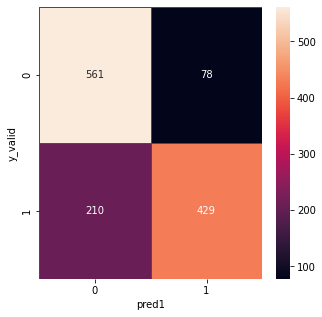

In [340]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred1).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred1")
plt.ylabel("y_valid")
plt.show()

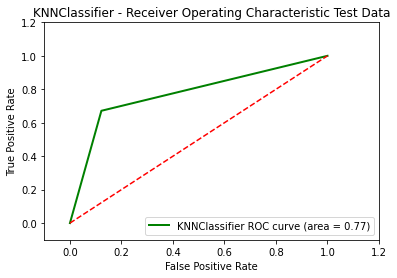

In [341]:
#roc curve
fpr1,tpr1,thres1 = roc_curve(y_valid, pred1)   
roc_auc1 = auc(fpr1, tpr1)   
plt.title('KNNClassifier - Receiver Operating Characteristic Test Data') 
plt.plot(fpr1, tpr1, color ='green', lw = 2, label='KNNClassifier ROC curve (area = %0.2f)' % roc_auc1) 
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression

In [343]:
lr = LogisticRegression(random_state = 42)
t1 = time.time()
lr.fit(X_train_tf,y_train)
pred2 = lr.predict(X_valid_tf)
t2 = time.time()
ts2  = accuracy_score(y_valid, pred2)*100  #test accuracy
trn2 = accuracy_score(y_train, lr.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred2)  
Sen2 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc2 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr2 = 1-Sen2
print('\nLogisticRegression model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred2))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


LogisticRegression model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.90      0.84      0.87       639
           1       0.85      0.90      0.88       639

    accuracy                           0.87      1278
   macro avg       0.87      0.87      0.87      1278
weighted avg       0.87      0.87      0.87      1278


Confusion matrix for test data:
 [[538 101]
 [ 61 578]]

Sensitivity :  0.8512518409425626
Specificity :  0.8981636060100167

Execution time for Model: 0.353529 seconds


True Neg:538
False Pos:101
False Neg:61
True Pos:578


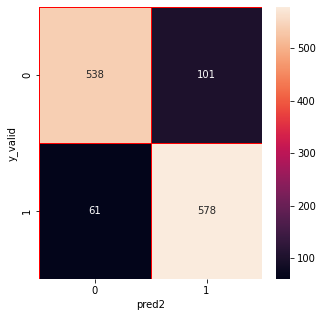

In [344]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred2).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred2")
plt.ylabel("y_valid")
plt.show()

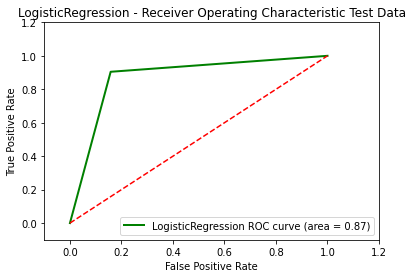

In [345]:
#roc curve
fpr2,tpr2,thres2 = roc_curve(y_valid, pred2) 
roc_auc2 = auc(fpr2, tpr2)
plt.title('LogisticRegression - Receiver Operating Characteristic Test Data') 
plt.plot(fpr2, tpr2, color ='green', lw = 2, label='LogisticRegression ROC curve (area = %0.2f)' % roc_auc2)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Naive Bayes

In [346]:
from sklearn.naive_bayes import GaussianNB  

In [347]:
nb = GaussianNB()  
t1 = time.time()
nb.fit(X_train_tf,y_train)
pred3 = nb.predict(X_valid_tf)
t2 = time.time()
ts3 = accuracy_score(y_valid, pred3)*100  #test accuracy
trn3 = accuracy_score(y_train, nb.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred3)
Sen3 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc3 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr3 = 1-Sen3
print('\nNB model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred3))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


NB model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.61      0.95      0.74       639
           1       0.88      0.38      0.53       639

    accuracy                           0.67      1278
   macro avg       0.74      0.67      0.64      1278
weighted avg       0.74      0.67      0.64      1278


Confusion matrix for test data:
 [[607  32]
 [395 244]]

Sensitivity :  0.8840579710144928
Specificity :  0.6057884231536926

Execution time for Model: 0.014849 seconds


True Neg:607
False Pos:32
False Neg:395
True Pos:244


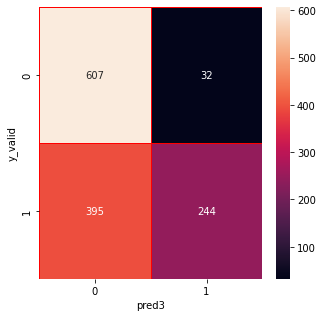

In [348]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred3).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred3")
plt.ylabel("y_valid")
plt.show()

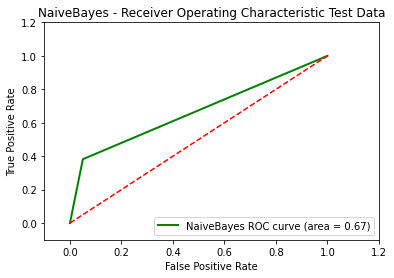

In [349]:
#roc curve
fpr3,tpr3,thres3 = roc_curve(y_valid, pred3) 
roc_auc3 = auc(fpr3, tpr3)
plt.title('NaiveBayes - Receiver Operating Characteristic Test Data') 
plt.plot(fpr3, tpr3, color ='green', lw = 2, label='NaiveBayes ROC curve (area = %0.2f)' % roc_auc3)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree

In [350]:
from sklearn.tree import DecisionTreeClassifier

In [351]:
tree = DecisionTreeClassifier(max_depth = 10,criterion = 'gini',random_state = 42)  
t1 = time.time()
tree.fit(X_train_tf,y_train)
pred4 = tree.predict(X_valid_tf)
t2 = time.time()
ts4 = accuracy_score(y_valid, pred4)*100  #test accuracy
trn4 = accuracy_score(y_train, tree.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred4)
Sen4 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc4 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr4 = 1-Sen4
print('\nDecisionTree model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred4))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


DecisionTree model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.88      0.83      0.85       639
           1       0.84      0.88      0.86       639

    accuracy                           0.86      1278
   macro avg       0.86      0.86      0.86      1278
weighted avg       0.86      0.86      0.86      1278


Confusion matrix for test data:
 [[530 109]
 [ 74 565]]

Sensitivity :  0.8382789317507419
Specificity :  0.8774834437086093

Execution time for Model: 0.068548 seconds


True Neg:530
False Pos:109
False Neg:74
True Pos:565


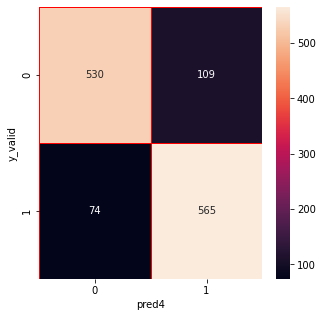

In [352]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred4).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred4")
plt.ylabel("y_valid")
plt.show()

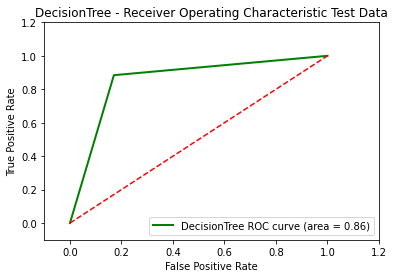

In [353]:
#roc curve
fpr4,tpr4,thres4 = roc_curve(y_valid, pred4) 
roc_auc4 = auc(fpr4, tpr4)
plt.title('DecisionTree - Receiver Operating Characteristic Test Data') 
plt.plot(fpr4, tpr4, color ='green', lw = 2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc4)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest

In [354]:
from sklearn.ensemble import RandomForestClassifier

In [355]:
RF = RandomForestClassifier(max_depth = 6,random_state = 42)  
t1 = time.time()
RF.fit(X_train_tf,y_train)
pred5 = RF.predict(X_valid_tf)
t2 = time.time()
ts5 = accuracy_score(y_valid, pred5)*100  #test accuracy
trn5 = accuracy_score(y_train, RF.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred5)
Sen5 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc5 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr5 = 1-Sen5
print('\nRandomForest model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred5))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


RandomForest model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.87      0.82      0.84       639
           1       0.83      0.88      0.85       639

    accuracy                           0.85      1278
   macro avg       0.85      0.85      0.85      1278
weighted avg       0.85      0.85      0.85      1278


Confusion matrix for test data:
 [[523 116]
 [ 76 563]]

Sensitivity :  0.8291605301914581
Specificity :  0.8731218697829716

Execution time for Model: 0.522517 seconds


True Neg:523
False Pos:116
False Neg:76
True Pos:563


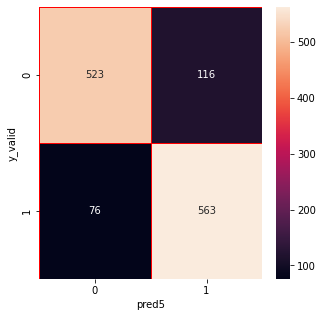

In [356]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred5).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred5")
plt.ylabel("y_valid")
plt.show()

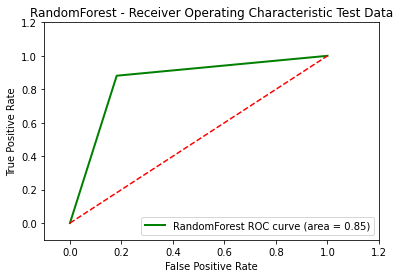

In [357]:
#roc curve
fpr5,tpr5,thres5 = roc_curve(y_valid, pred5) 
roc_auc5 = auc(fpr5, tpr5)
plt.title('RandomForest - Receiver Operating Characteristic Test Data') 
plt.plot(fpr5, tpr5, color ='green', lw = 2, label='RandomForest ROC curve (area = %0.2f)' % roc_auc5)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Gradientboosting

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

In [359]:
gb = GradientBoostingClassifier(max_depth=3,n_estimators=100, learning_rate=1.0,random_state=42)
t1 = time.time()
gb.fit(X_train_tf,y_train)
pred6 = gb.predict(X_valid_tf)
t2 = time.time()
ts6 = accuracy_score(y_valid, pred6)*100  #test accuracy
trn6 = accuracy_score(y_train, gb.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred6)
Sen6 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc6 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr6 = 1-Sen6
print('\nGradientBoosting model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred6))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


GradientBoosting model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.90      0.83      0.86       639
           1       0.84      0.91      0.87       639

    accuracy                           0.87      1278
   macro avg       0.87      0.87      0.87      1278
weighted avg       0.87      0.87      0.87      1278


Confusion matrix for test data:
 [[528 111]
 [ 59 580]]

Sensitivity :  0.8393632416787264
Specificity :  0.899488926746167

Execution time for Model: 1.427830 seconds


True Neg:528
False Pos:111
False Neg:59
True Pos:580


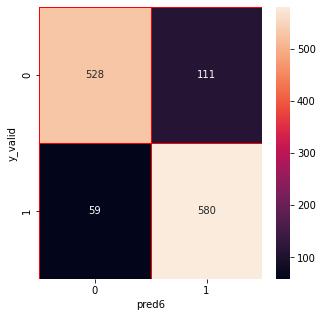

In [360]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred6).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred6")
plt.ylabel("y_valid")
plt.show()

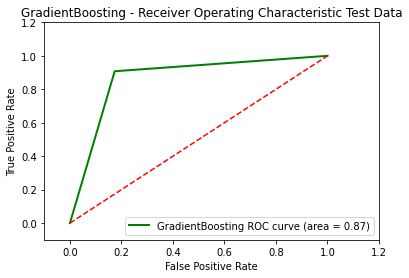

In [361]:
#roc curve
fpr6,tpr6,thres6 = roc_curve(y_valid, pred6) 
roc_auc6 = auc(fpr6, tpr6)
plt.title('GradientBoosting - Receiver Operating Characteristic Test Data') 
plt.plot(fpr6, tpr6, color ='green', lw = 2, label='GradientBoosting ROC curve (area = %0.2f)' % roc_auc6)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Model Selection

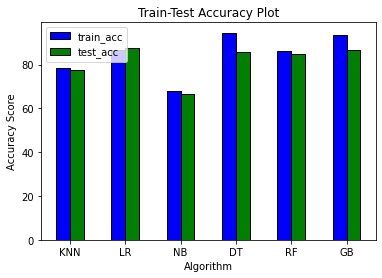

In [362]:
# Bar plots of train and test data accuracies for all models
train_acc = [trn1,trn2,trn3,trn4,trn5,trn6]
test_acc = [ts1, ts2, ts3, ts4, ts5, ts6]

n=6
r = np.arange(n)
width = 0.25
plt.bar(r, train_acc, color = 'b',width = width, edgecolor = 'black',label='train_acc')
plt.bar(r + width, test_acc, color = 'g',width = width, edgecolor = 'black',label='test_acc')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Train-Test Accuracy Plot")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['KNN','LR','NB','DT', 'RF','GB'])
plt.legend()

plt.show()

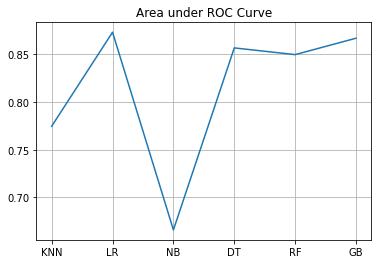

In [363]:
# Area under ROC Curv
algo = ['KNN','LR','NB','DT', 'RF','GB']
auc = [roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6]
plt.grid(True)
plt.title('Area under ROC Curve')
plt.plot(algo,auc)
plt.show()

# Conclusion

Looking at above two plots we are good to go with Gradient Boosting algorithm given high auc and high train test accuracy